In [ ]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels
import scipy.stats as stats
import statsmodels.stats.proportion as smpt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

In [2]:
df=pd.read_csv('diabetic_data.csv')

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.shape

(101766, 50)

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df1=pd.read_csv('IDs_mapping.csv')

In [8]:
df1.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [9]:
df1

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


So these are the admission type descreption of the column admission_type_id	

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] #Categorical Variable

dfc

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

The above are categorical columns present in the dataset

In [12]:
dfn= [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
dfn

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

The above are numerical columns present in the dataset

In [13]:
df1['description'].value_counts()

description                                                                                                  2
Not Mapped                                                                                                   2
Not Available                                                                                                2
Unknown/Invalid                                                                                              2
 Not Available                                                                                               1
Transfer from a hospital                                                                                     1
Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere                      1
Emergency                                                                                                    1
Discharged/transferred to another type of inpatient care institution                                         1
 

In [14]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


5 point summary or statistical analysis of all the numerical columns 

In [15]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

There are no null values in the dataset that means no Nans or blanks we might have strings like (,?-) let us see the data thoroughly and make sure there are no null values

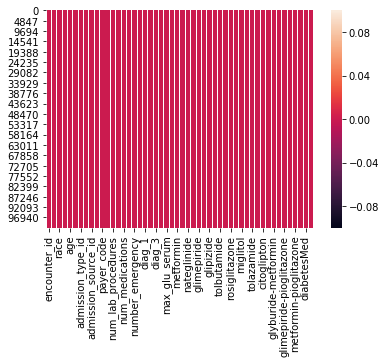

In [16]:
sns.heatmap(df.isnull())
plt.show()

In [17]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

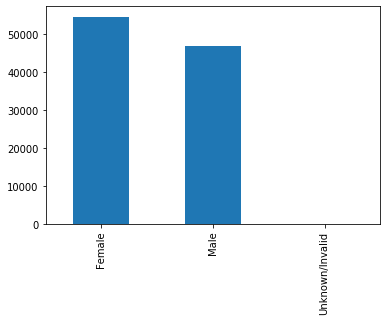

In [18]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [19]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

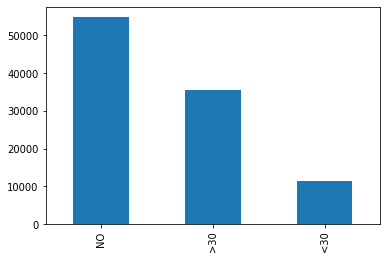

In [20]:
df['readmitted'].value_counts().plot(kind='bar')
plt.show()

In [21]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


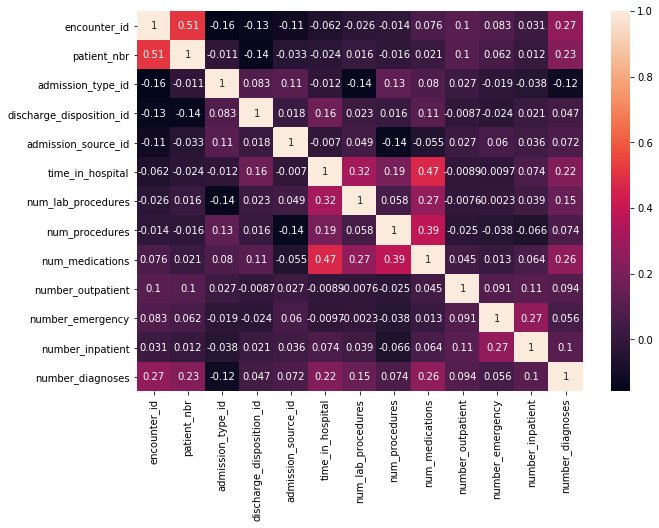

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df1['admission_type_id'].value_counts()

3                           3
6                           3
2                           3
1                           3
4                           3
8                           3
7                           3
5                           3
24                          2
11                          2
10                          2
14                          2
18                          2
26                          2
22                          2
13                          2
9                           2
23                          2
21                          2
20                          2
25                          2
15                          2
19                          2
17                          2
12                          2
16                          1
30                          1
29                          1
28                          1
27                          1
admission_source_id         1
discharge_disposition_id    1
Name: admission_type_id, dtype: int64

In [24]:
df['readmitted'].replace({'>30':1,'<30':1,'NO':0},inplace=True)

Replacing greater than 30 days and less than 30 days to 1 (yes) as the patient has been readmitted and No(Not readmitted) to 0.

In [25]:
df['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

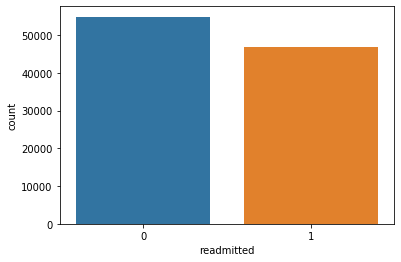

In [26]:
sns.countplot(df['readmitted'])
plt.show()

Initially when we checked for null values we see that there were no nulls in the data set after thorough examination of the data it is found that there are lot of ? in few of the columns .Which might be mistyped or unfilled at the time of data entry we assume those as null and let us replace those with nan

# Null Value Imputation

In [27]:
df.replace({'?':np.nan},inplace=True)

In [28]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

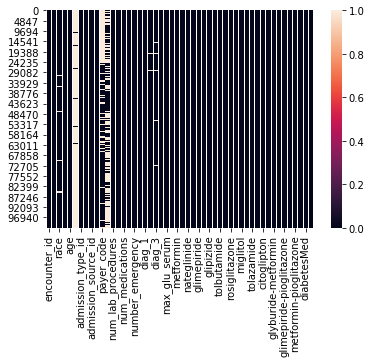

In [29]:
sns.heatmap(df.isnull())
plt.show()

In [30]:
df.isnull().sum() / len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Weight,payercode and medical specality have more than 30% of missing values so let us drop these columns 

In [31]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [32]:
df.shape

(101766, 47)

earler we had 50 columns and after dropping 3 columns we see it is 47 now

In [33]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [34]:
df['race'].fillna('Caucasian',inplace=True)

replacing race null values with mode and replacing diag_1,diag_2 and diag_3 values with median 

In [35]:
df['diag_1']=df['diag_1'].str.replace('E','-')
df['diag_1']=df['diag_1'].str.replace('V','-')

In [36]:
df['diag_1'].fillna(df['diag_1'].median(),inplace=True)

In [37]:
df['diag_1']=df['diag_1'].astype(float)

In [38]:
df['diag_2']=df['diag_2'].str.replace('E','-')
df['diag_2']=df['diag_2'].str.replace('V','-')
df['diag_2'].fillna(df['diag_2'].median(),inplace=True)

In [39]:
df['diag_2']=df['diag_2'].astype(float)

In [40]:
df['diag_3']=df['diag_3'].str.replace('E','-')
df['diag_3']=df['diag_3'].str.replace('V','-')
df['diag_3'].fillna(df['diag_3'].median(),inplace=True)

In [41]:

df['diag_3']=df['diag_3'].astype(float)

In [42]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [43]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [44]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [45]:
pd.crosstab(df['gender'],df['readmitted'])

readmitted,0,1
gender,,
Female,29038,25670
Male,25823,21232
Unknown/Invalid,3,0


In [46]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

# Numerical Columns

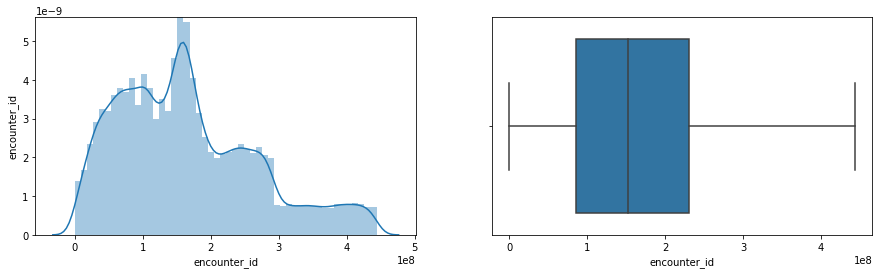

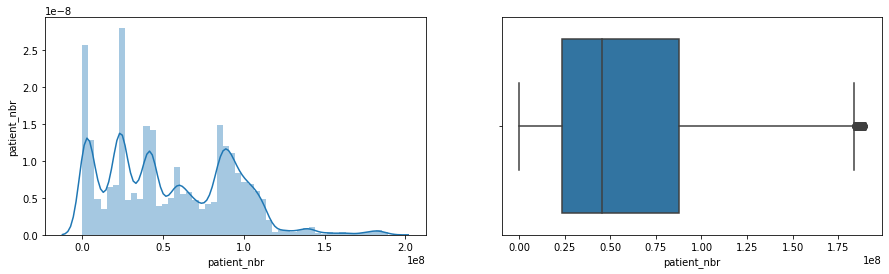

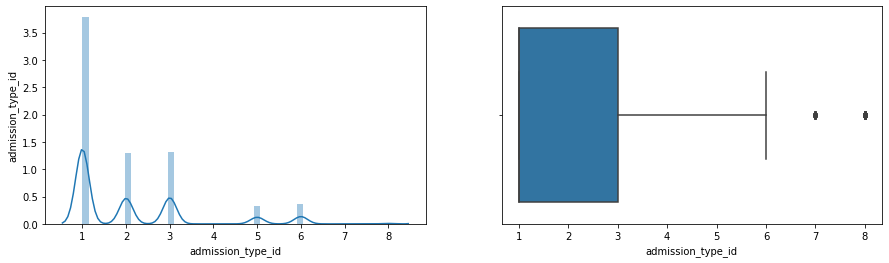

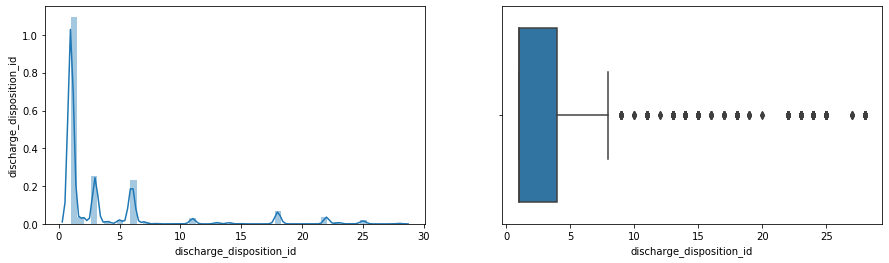

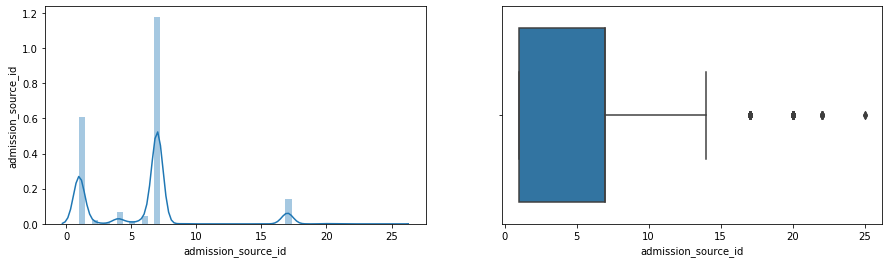

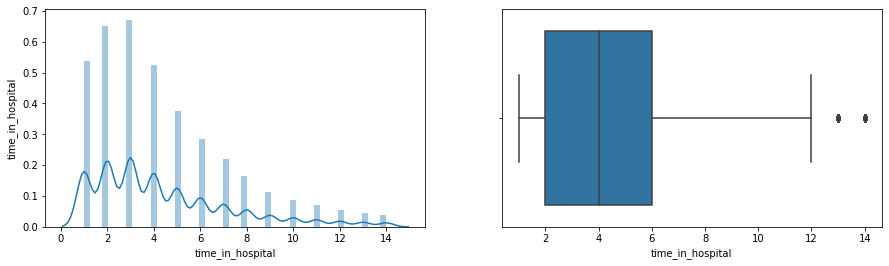

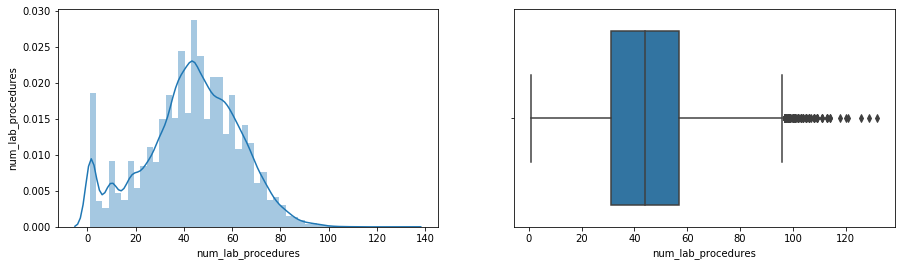

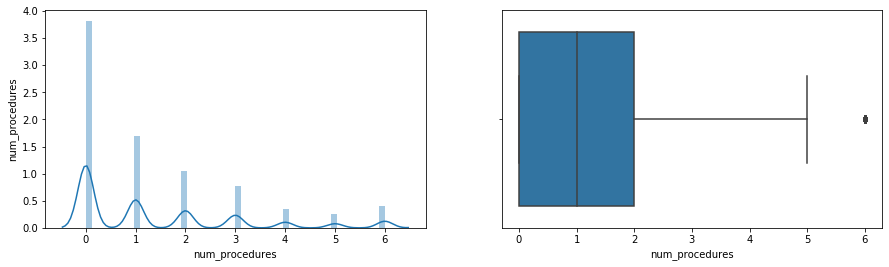

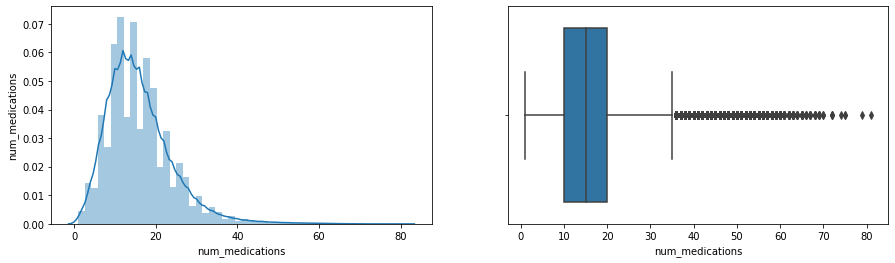

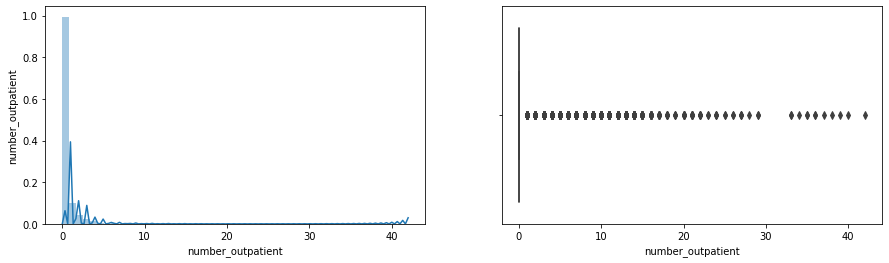

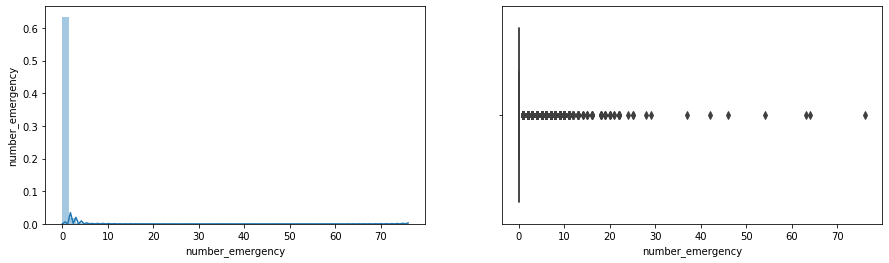

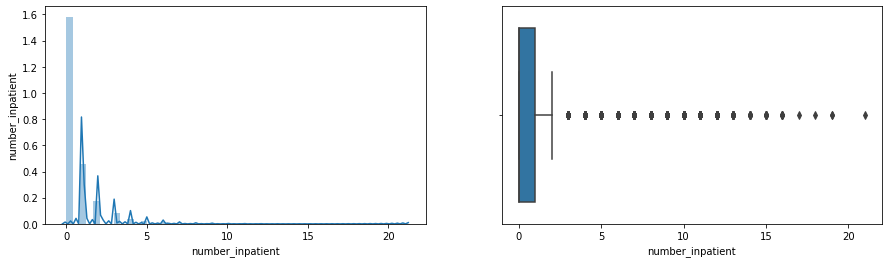

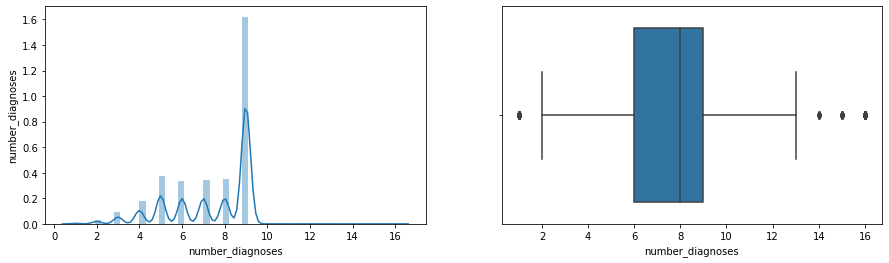

In [47]:
#For checking presence of outliers

for var in dfn:
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot((df[var]))
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.boxplot((df[var]))
    fig.set_xlabel(var)

    plt.show()

In [48]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [49]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] #Categorical Variable

dfc

['race',
 'gender',
 'age',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

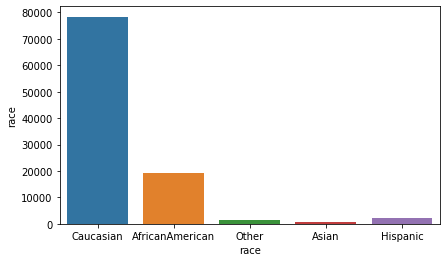

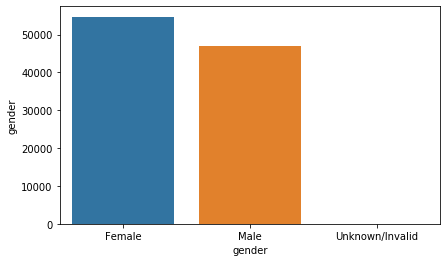

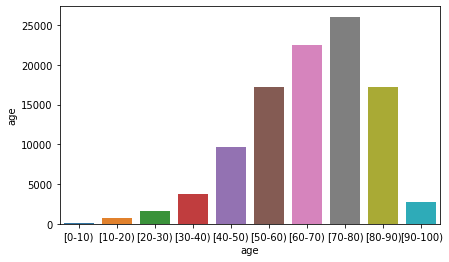

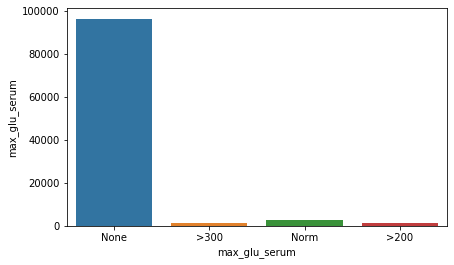

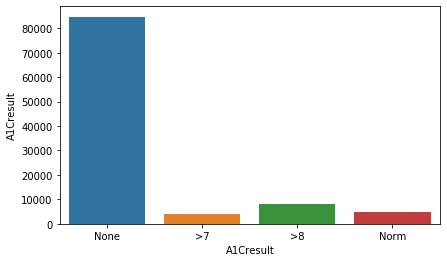

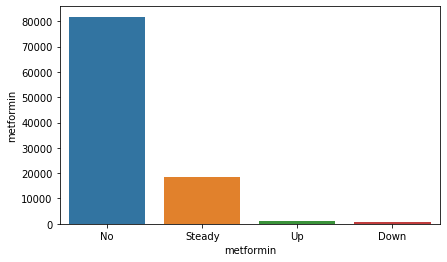

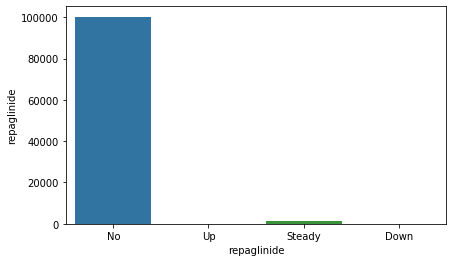

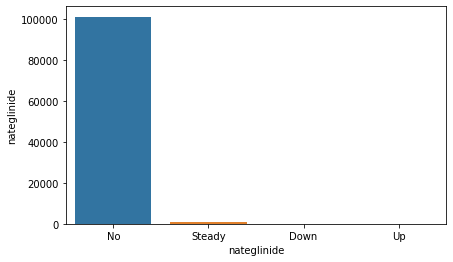

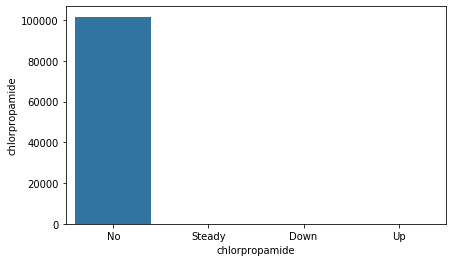

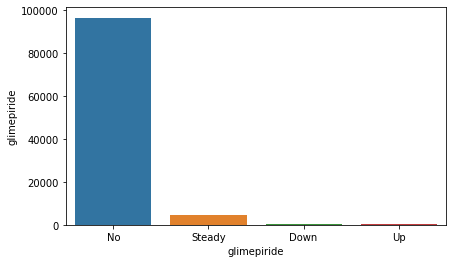

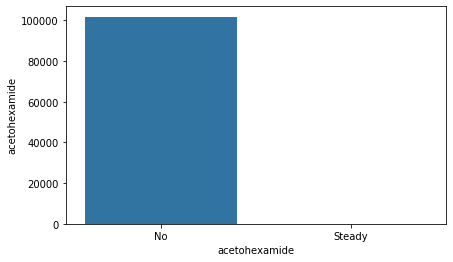

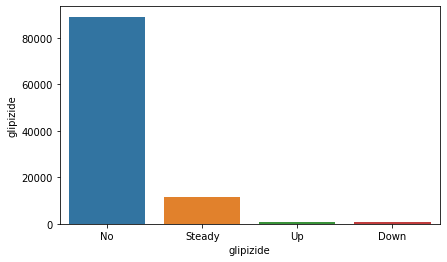

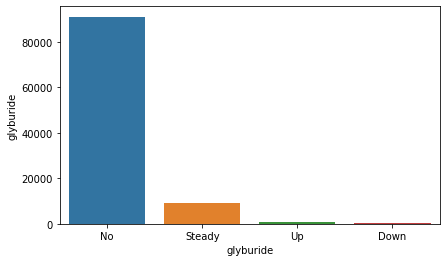

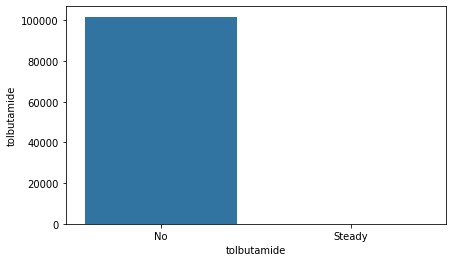

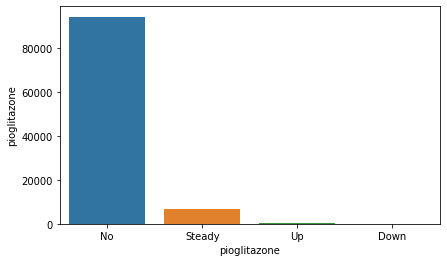

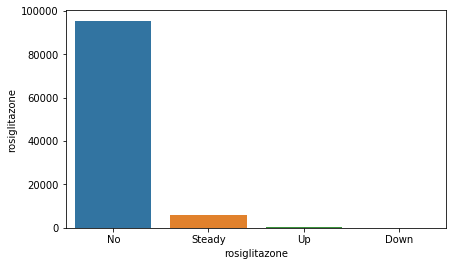

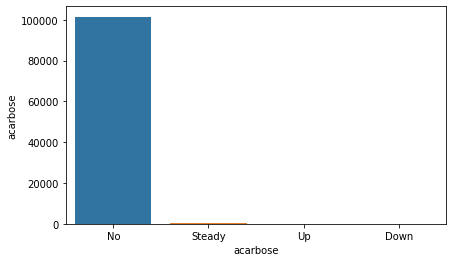

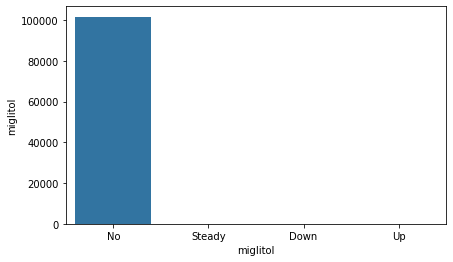

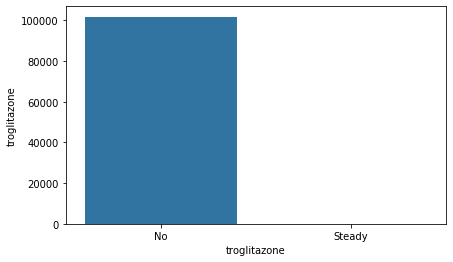

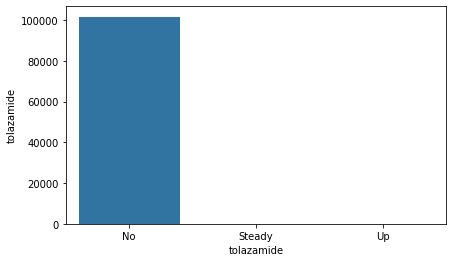

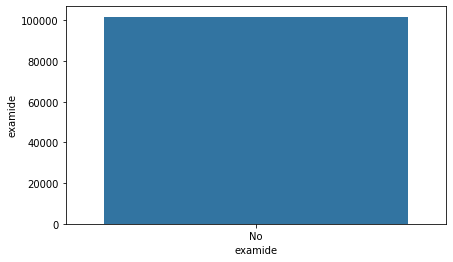

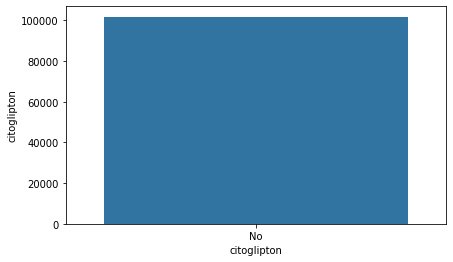

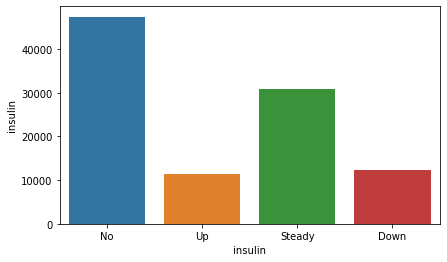

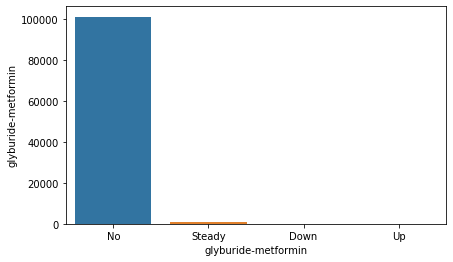

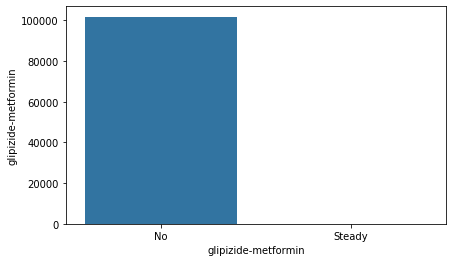

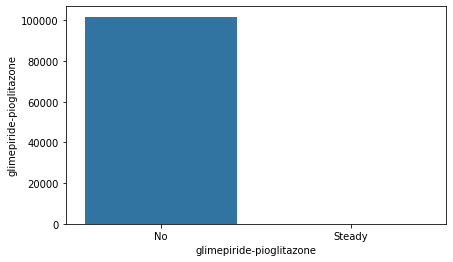

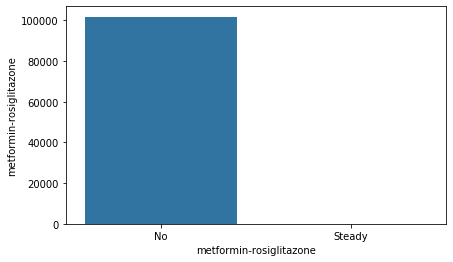

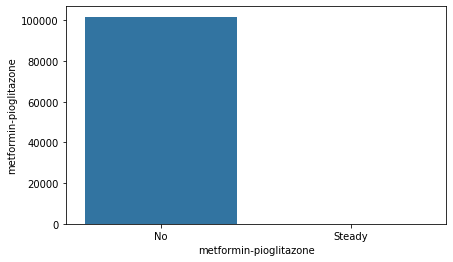

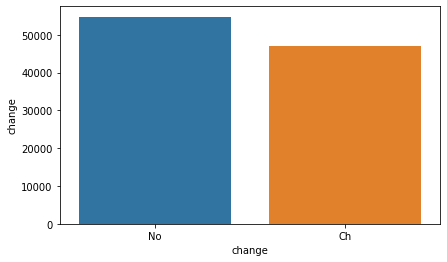

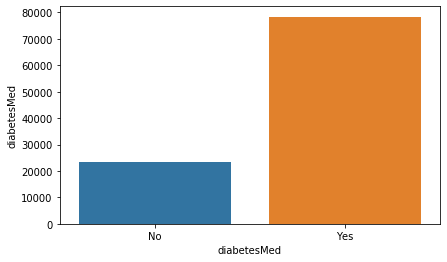

In [50]:
for var in dfc:
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    fig = sns.countplot((df[var]))
    fig.set_title('')
    fig.set_ylabel(var)
    

    plt.show()

In [51]:
# Mapping admission source ids with their respective descriptions

df['admission_source'] = df ['admission_source_id'].replace({1:'Through Reference',2:'Through Reference',
                                                       3:'Through Reference',4:'Transfer from a Facility/Hospital',
                                                       5:'Transfer from a Facility/Hospital',
                                                       6:'Transfer from a Facility/Hospital',
                                                       7:'Admitted from emergency room',8:'Otherwise',
                                                       9:'Not Available',10:'Transfer from a Facility/Hospital',
                                                       11:'Otherwise',13:'Otherwise',14:'Otherwise',15:'Not Available',
                                                       17:'Not Available',20:'Not Available',21:'Not Available',22:'Transfer from a Facility/Hospital',
                                                       23:'Otherwise',24:'Otherwise',25:'Transfer from a Facility/Hospital',
                                                       26:'Transfer from a Facility/Hospital'})

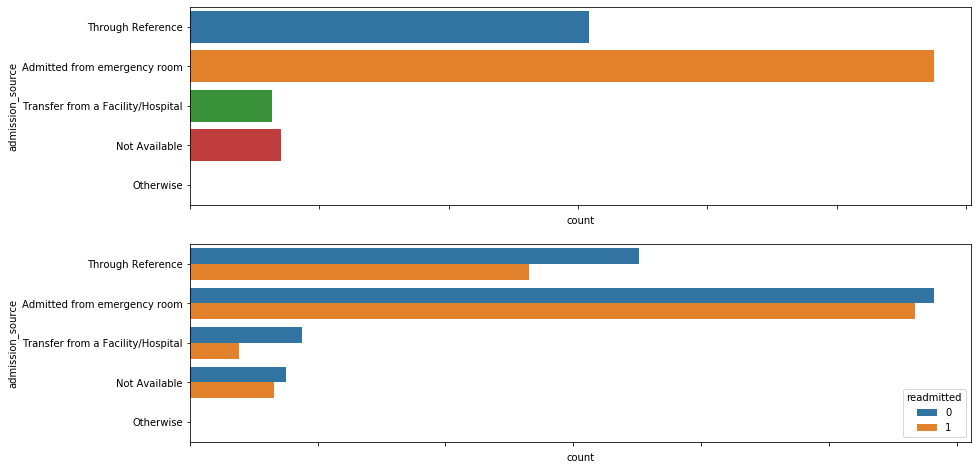

In [52]:
# Count plot of admission sources by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=df['admission_source'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=df['admission_source'],hue = df['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

Admitted from emergency room patients recorded highest number of readmissions and Transfer from  facility/Hospital the least

# Outlier Treatment

In [53]:
def cap_outliers(series, iqr_threshold=1.5, verbose=True):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = lbound
    series.loc[series > ubound] = ubound

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

In [54]:
for i in dfn:
    print("Outlier Treatment for",i)
    df[i]=cap_outliers(df[i])

Outlier Treatment for encounter_id
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -133003346.25
   Upper bound: 448235427.75

Outlier Treatment for patient_nbr
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -72785872.125
   Upper bound: 183745042.875

Outlier Treatment for admission_type_id
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -2.0
   Upper bound: 6.0

Outlier Treatment for discharge_disposition_id
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -3.5
   Upper bound: 8.5

Outlier Treatment for admission_source_id
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -8.0
   Upper bound: 16.0

Outlier Treatment for time_in_hospital
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -4.0
   Upper bound: 12.0

Outlier Treatment for num_lab_procedures
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -8.0
   U

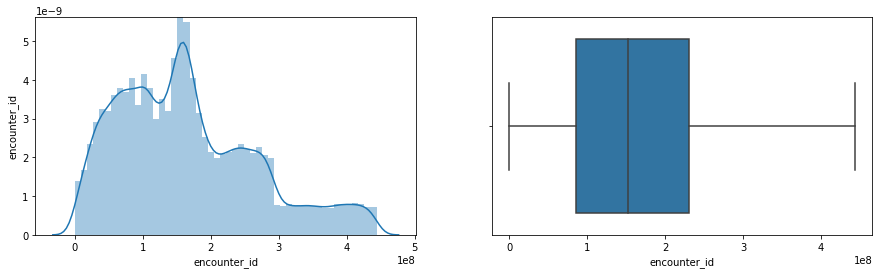

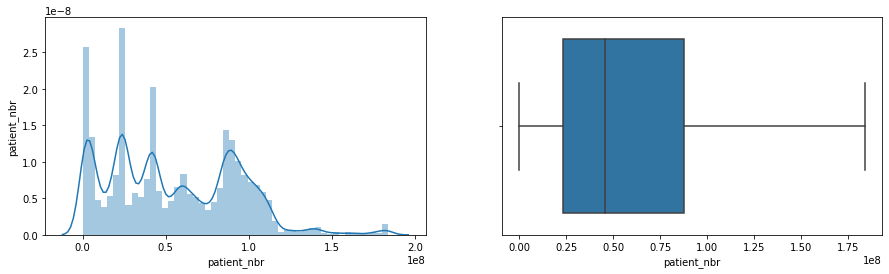

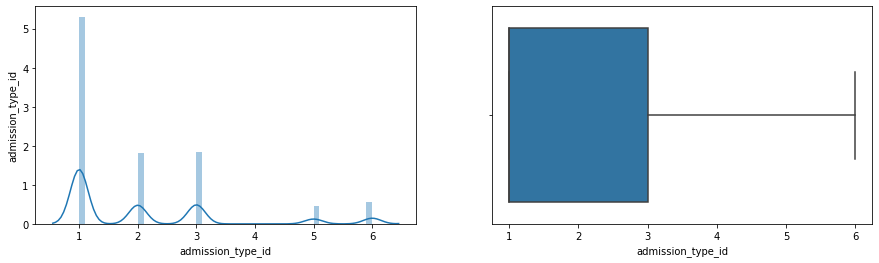

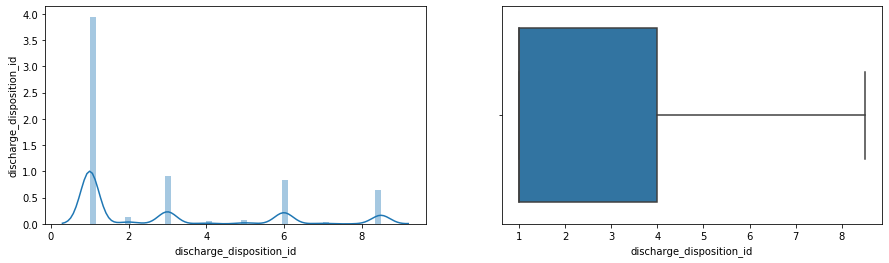

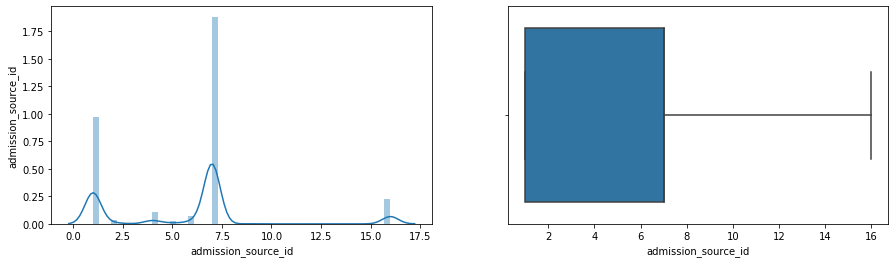

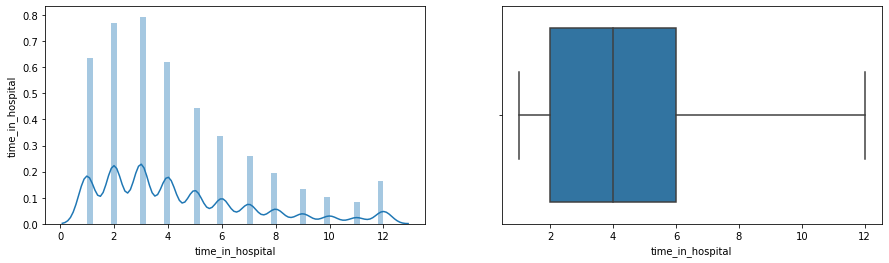

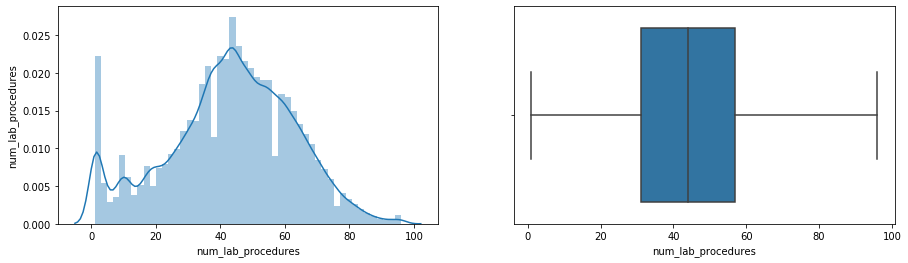

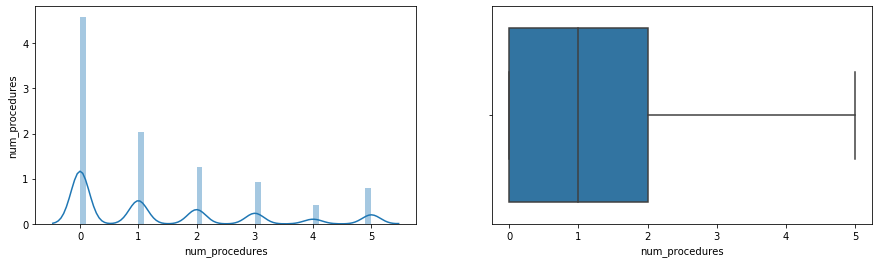

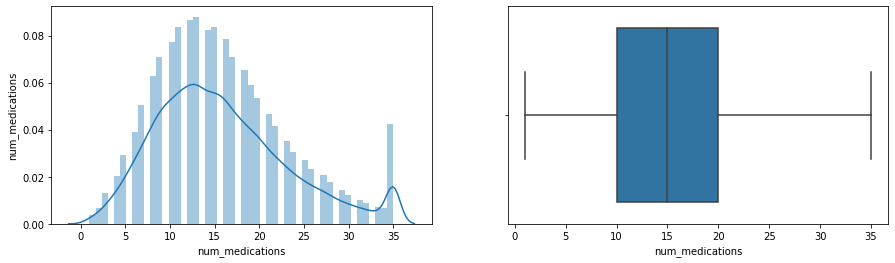

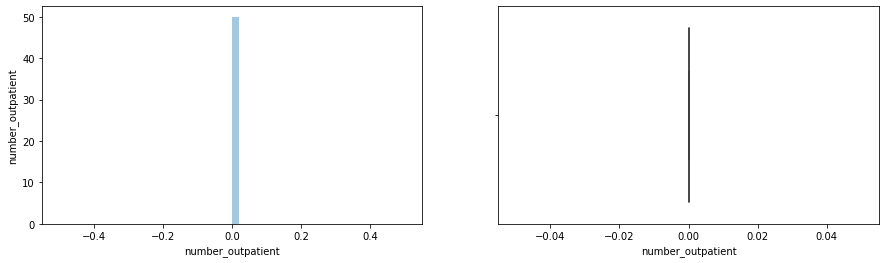

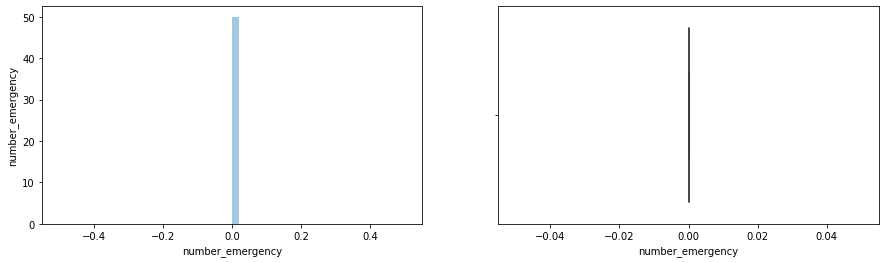

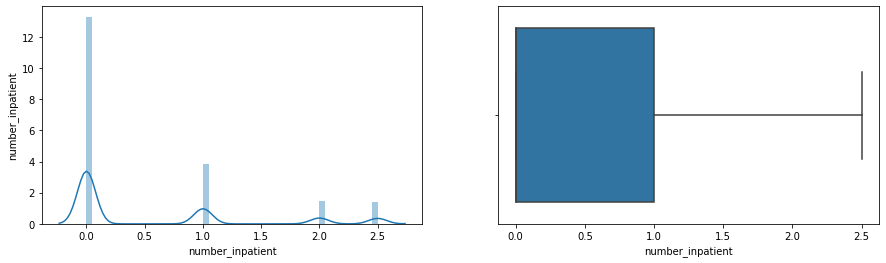

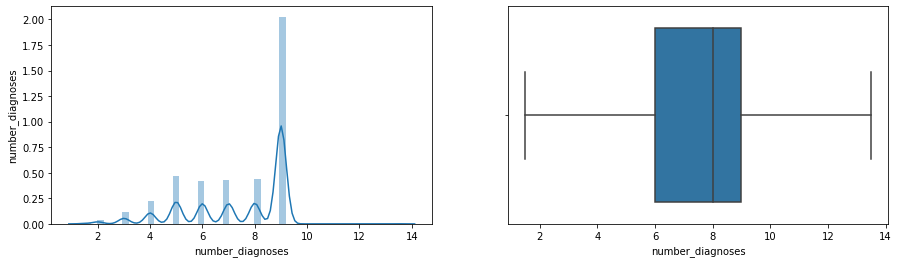

In [55]:
#For checking presence of outliers

for var in dfn:
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot((df[var]))
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.boxplot((df[var]))
    fig.set_xlabel(var)

    plt.show()

Outlier treatment has been done using Inter Quartile Range IQR=Q3-Q1 and treating outliers to LL and UL.

# Categorical Columns and Target Bi Variate Analysis

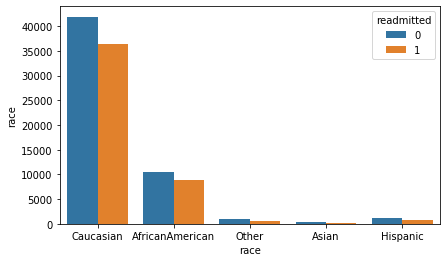

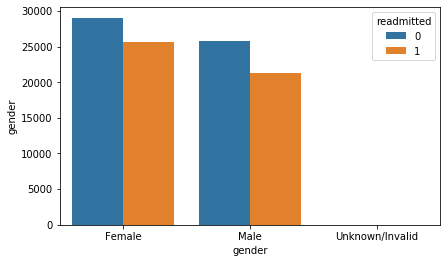

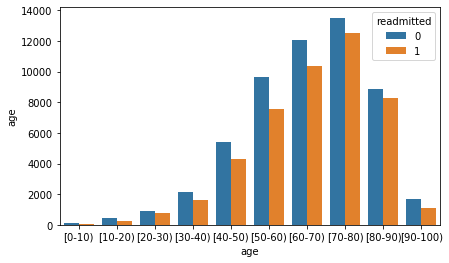

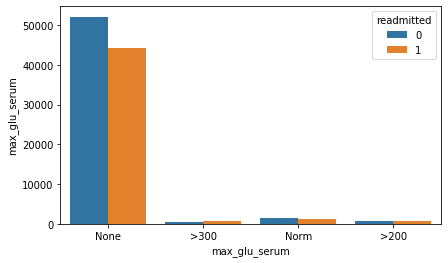

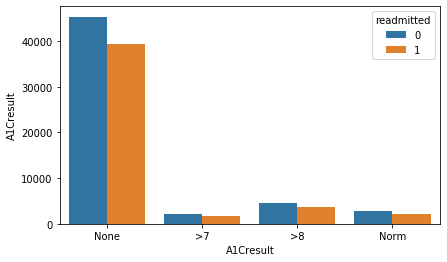

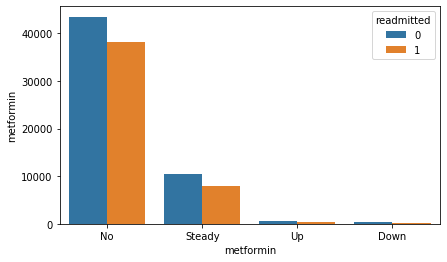

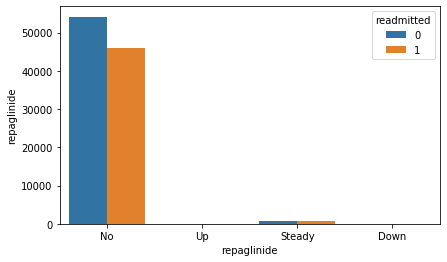

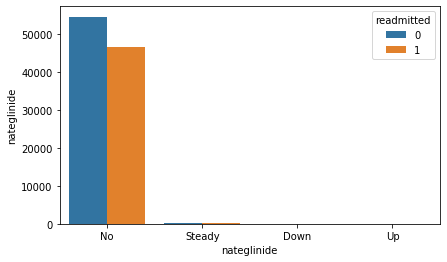

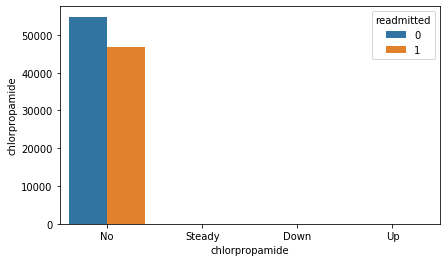

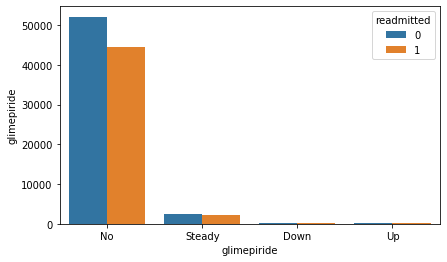

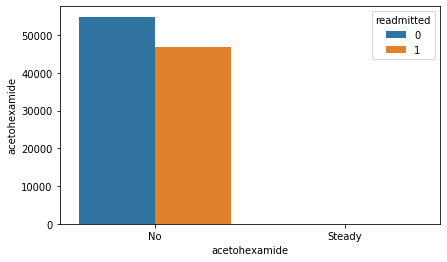

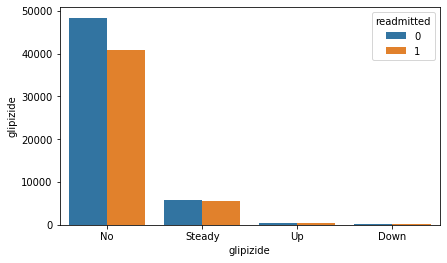

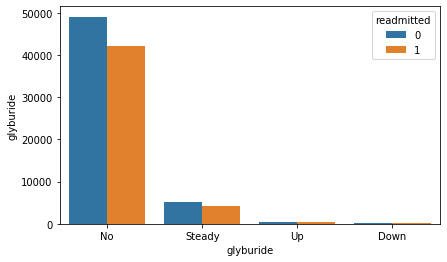

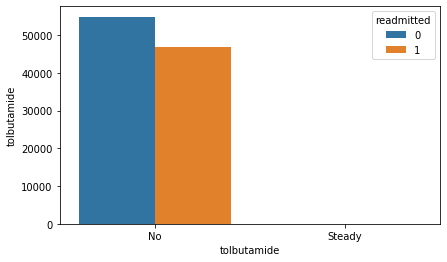

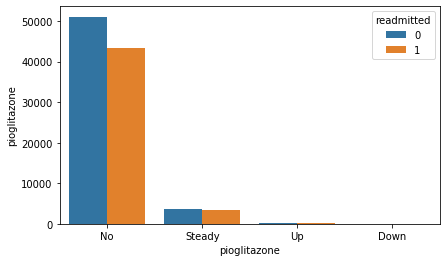

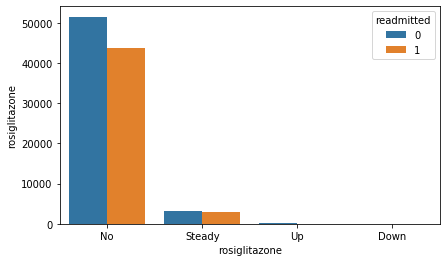

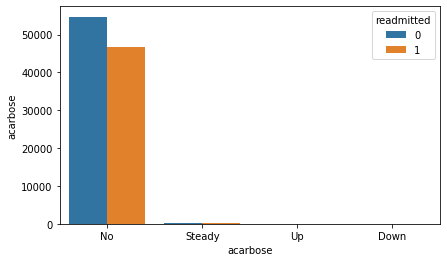

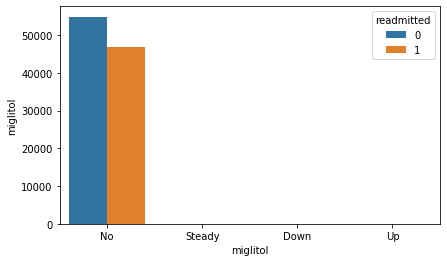

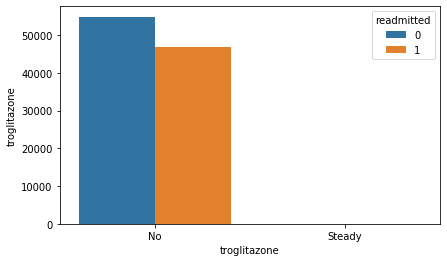

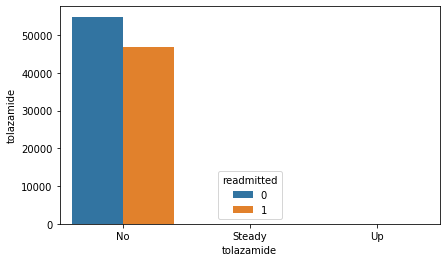

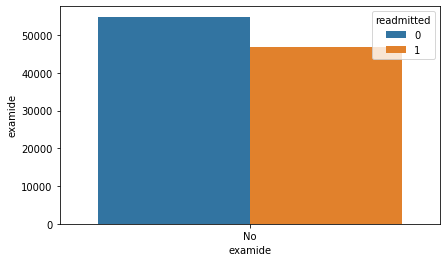

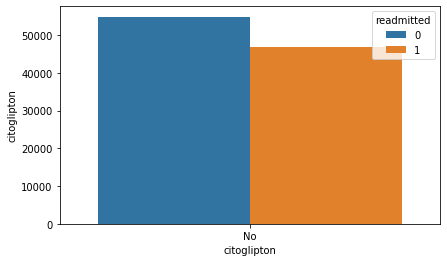

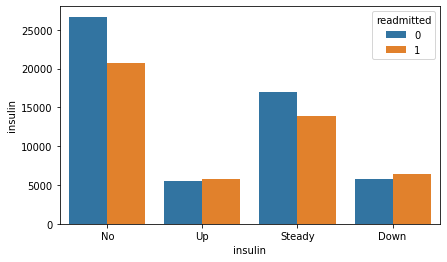

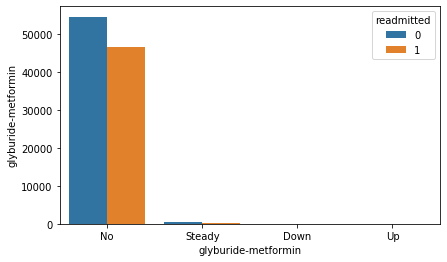

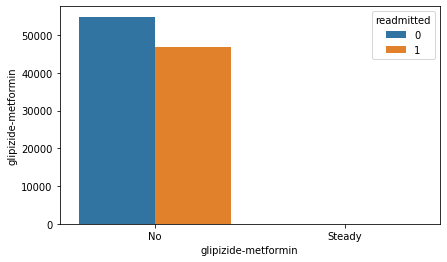

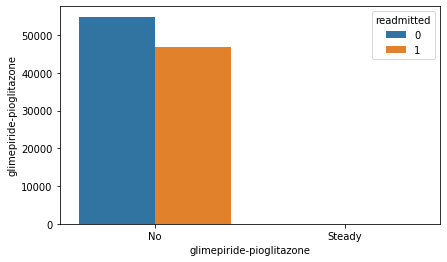

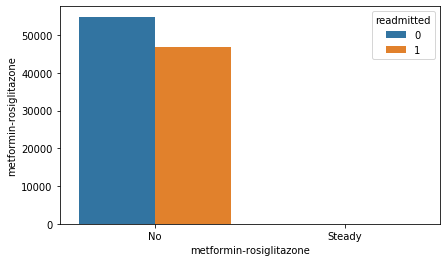

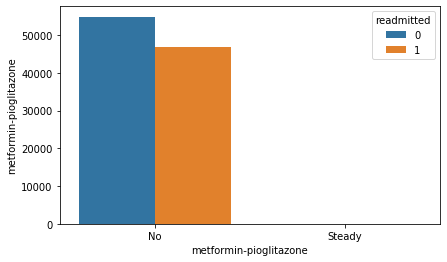

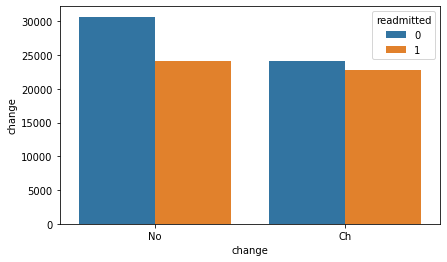

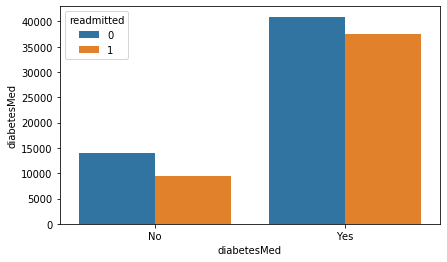

In [56]:
for var in dfc:
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    fig = sns.countplot((df[var]),hue=df['readmitted'])
    fig.set_title('')
    fig.set_ylabel(var)
    

    plt.show()

# Feature Selection

In [57]:
from scipy.stats import ttest_ind

In [58]:
num_col = ['int16','int32','int64','float16','float32','float64']

df_numcols_only1= df.select_dtypes(include= num_col)
df_numcols_only1.drop('readmitted',axis=1,inplace=True) 

In [59]:
cat_col=['object']
df_catcols_only1=df.select_dtypes(include=cat_col)

In [60]:
df_numcols_only1.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses'],
      dtype='object')

In [61]:
df_catcols_only1.columns

Index(['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_source'],
      dtype='object')

# Hypothesis Testing

In [62]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [63]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)
    rejectH0 = ttest[1] < 0.05
    print()
    #return rejectH0
    if rejectH0:
        print('Reject H0')
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')         
        print()
        print('-------------------------------------------------------------------------')

In [64]:
num_cols = ['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses']

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(df['readmitted'], df[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Fails to reject H0 :', reject)

print()
print('Columns Reject H0 :', not_reject)

H0: The mean of encounter_id is equal for both categories of readmitted
Ha: The mean of encounter_id is NOT equal for both categories of readmitted

Ttest_indResult(statistic=12.216281610288696, pvalue=2.68952169865043e-34)

Reject H0


-------------------------------------------------------------------------
H0: The mean of patient_nbr is equal for both categories of readmitted
Ha: The mean of patient_nbr is NOT equal for both categories of readmitted

Ttest_indResult(statistic=-23.72756944471523, pvalue=4.080232665865122e-124)

Reject H0


-------------------------------------------------------------------------
H0: The mean of admission_type_id is equal for both categories of readmitted
Ha: The mean of admission_type_id is NOT equal for both categories of readmitted

Ttest_indResult(statistic=1.2299246397652674, pvalue=0.21872816968208444)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of discharge_disposition_id is equal

In [65]:
cat_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']
reject = []
not_reject = []

for col in cat_cols:
    chisquare_test(df['readmitted'], df[col])
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
print()    
print('Columns Fails to Reject H0 :', reject)
print()
print('Columns Rejected H0 :', not_reject)

H0: There is NO association between readmitted and race
Ha: There is an association between readmitted and race

race        AfricanAmerican  Asian  Caucasian  Hispanic  Other
readmitted                                                    
0                     10421    415      41930      1183    915
1                      8789    226      36442       854    591

chi-val = 79.06520306638988
p-val = 2.747981332269931e-16

Reject H0

---------------------------------------------------------------
H0: There is NO association between readmitted and gender
Ha: There is an association between readmitted and gender

gender      Female   Male  Unknown/Invalid
readmitted                                
0            29038  25823                3
1            25670  21232                0

chi-val = 35.55772261412721
p-val = 1.899934547488499e-08

Reject H0

---------------------------------------------------------------
H0: There is NO association between readmitted and age
Ha: There is an assoc

1            46902

chi-val = 0.0
p-val = 1.0

Failed to reject H0

---------------------------------------------------------------
H0: There is NO association between readmitted and insulin
Ha: There is an association between readmitted and insulin

insulin     Down     No  Steady    Up
readmitted                           
0           5768  26678   16934  5484
1           6450  20705   13915  5832

chi-val = 477.15251930504627
p-val = 4.2640562716763655e-103

Reject H0

---------------------------------------------------------------
H0: There is NO association between readmitted and glyburide-metformin
Ha: There is an association between readmitted and glyburide-metformin

glyburide-metformin  Down     No  Steady  Up
readmitted                                  
0                       5  54494     358   7
1                       1  46566     334   1

chi-val = 7.048027294095067
p-val = 0.07038263192984316

Failed to reject H0

---------------------------------------------------------

In [66]:
# dropping columns related to IDs

df.drop(['encounter_id','patient_nbr',"discharge_disposition_id","admission_source_id","admission_type_id"],
          axis=1,inplace=True)

In [67]:
df.shape

(101766, 43)

# Get Dummies

In [68]:
new_df=pd.get_dummies(df,drop_first=True)

we used get dummies to convert categorical to numerical

In [69]:
new_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,admission_source_Not Available,admission_source_Otherwise,admission_source_Through Reference,admission_source_Transfer from a Facility/Hospital
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,425.00,401.0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276.00,250.01,255.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,11.0,5.0,13.0,0.0,0.0,1.0,648.00,250.00,-27.0,...,0,0,0,0,1,1,0,0,0,0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8.00,250.43,403.0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197.00,157.00,250.0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
new_df.shape

(101766, 87)

In [71]:
X1=new_df.drop(columns=['readmitted'],axis=1)
y1=new_df['readmitted']

In [72]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(71236, 86)
(30530, 86)
(71236,)
(30530,)


In [73]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
print('Training score =', model1.score(Xtrain, ytrain))
print('Test score =', model1.score(Xtest, ytest))

Training score = 0.6145909371666012
Test score = 0.6172289551261054


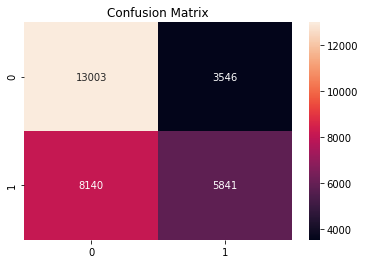

In [75]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [76]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.6172289551261054
Precision = 0.6222435282837967
Recall = 0.4177812745869394
F1 Score = 0.499914412872304


In [77]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [78]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6172289551261054 

 The Miss-classification = 1-Accuracy =  0.3827710448738946 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.4177812745869394 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7857272342739743 

 Positive Predictive value = TP / (TP+FP) =  0.6222435282837967 

 Negative predictive Value = TN / (TN+FN) =  0.6150026013337748 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  1.949763765690711 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.7409934389649112


In [79]:
y_pred_prob=model1.predict_proba(Xtest)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no  (0)','Prob of yes (1)'])
y_pred_prob_df.head()

,Prob of no (0),Prob of yes (1)
0,0.554508,0.445492
1,0.402043,0.597957
2,0.320637,0.679363
3,0.598065,0.401935
4,0.425094,0.574906


In [80]:
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=model1.predict_proba(Xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    


With 0.1 threshold the Confusion Matrix is  
 [[    0 16549]
 [    0 13981]] 
 with 13981 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[    0 16549]
 [    0 13981]] 
 with 13981 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.3 threshold the Confusion Matrix is  
 [[  957 15592]
 [  287 13694]] 
 with 14651 correct predictions and 287 Type II errors( False Negatives) 

 Sensitivity:  0.9794721407624634 Specificity:  0.0578282675690374 



With 0.4 threshold the Confusion Matrix is  
 [[ 7502  9047]
 [ 3674 10307]] 
 with 17809 correct predictions and 3674 Type II errors( False Negatives) 

 Sensitivity:  0.7372147915027537 Specificity:  0.45332044232279894 



With 0.5 threshold the Confusion Matrix is  
 [[13003  3546]
 [ 8140  5841]] 
 with 18844 correct predictions and 8140 Type II errors( False Negatives) 

 Sensitivity

ROC AUC = 0.6476955429212653


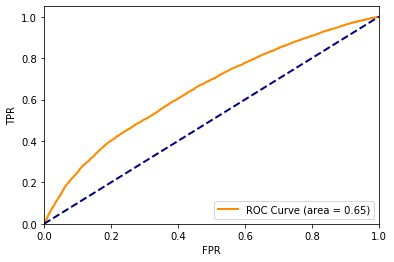

In [81]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Decesion Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
print('Training score =',DecisionTree.score(Xtrain, ytrain))
print('Test score =', DecisionTree.score(Xtest, ytest))

Training score = 1.0
Test score = 0.5437929905011464


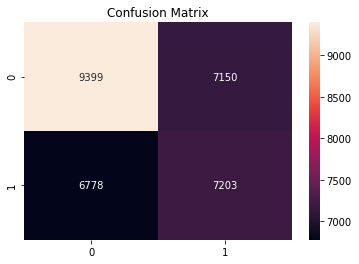

In [99]:
from sklearn.metrics import confusion_matrix
ypred = DecisionTree.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.5415744619858631


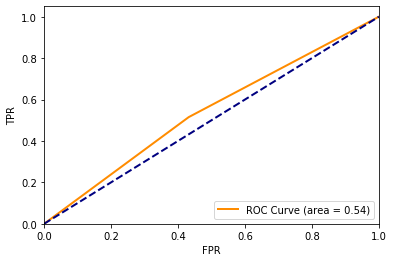

In [100]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = DecisionTree.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision tree is overfitting for this data set let us build Ensemble Techniques

# Bagging

In [84]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [85]:
Bagging = BaggingClassifier()
Bagging.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [86]:
print('Training score =',Bagging.score(Xtrain, ytrain))
print('Test score =', Bagging.score(Xtest, ytest))

Training score = 0.9815261946206973
Test score = 0.5907304290861448


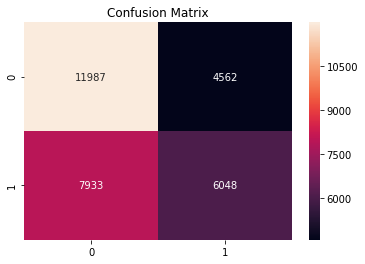

In [87]:
from sklearn.metrics import confusion_matrix
ypred = Bagging.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.6159399342621911


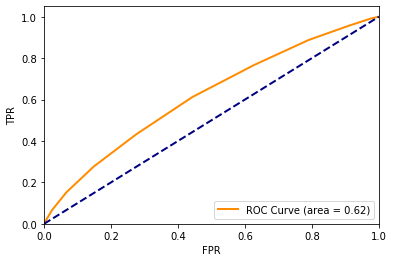

In [88]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = Bagging.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importances

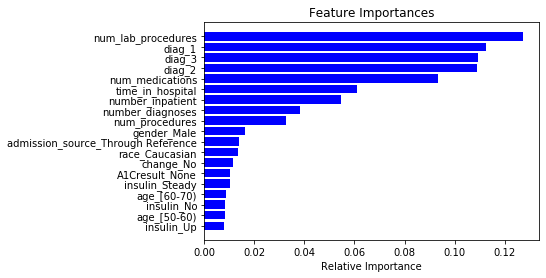

In [106]:
features = X1.columns
importances =  DecisionTree.feature_importances_
indices = np.argsort(importances)[-19:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [98]:
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03099
Feature: 1, Score: 0.00046
Feature: 2, Score: -0.08501
Feature: 3, Score: 0.00179
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.53362
Feature: 7, Score: -0.00007
Feature: 8, Score: -0.00011
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.06130
Feature: 11, Score: -0.00417
Feature: 12, Score: -0.01942
Feature: 13, Score: -0.00759
Feature: 14, Score: -0.00811
Feature: 15, Score: -0.04867
Feature: 16, Score: -0.00014
Feature: 17, Score: -0.00308
Feature: 18, Score: -0.00014
Feature: 19, Score: -0.01223
Feature: 20, Score: -0.01529
Feature: 21, Score: -0.02613
Feature: 22, Score: -0.00853
Feature: 23, Score: 0.02636
Feature: 24, Score: 0.00494
Feature: 25, Score: -0.01857
Feature: 26, Score: 0.00530
Feature: 27, Score: -0.05721
Feature: 28, Score: -0.00371
Feature: 29, Score: -0.00732
Feature: 30, Score: -0.01253
Feature: 31, Score: -0.02432
Feature: 32, Score: -0.00402
Feature: 33, Score: -0.04607
Feature: 34, Score: -0.00539
Featur

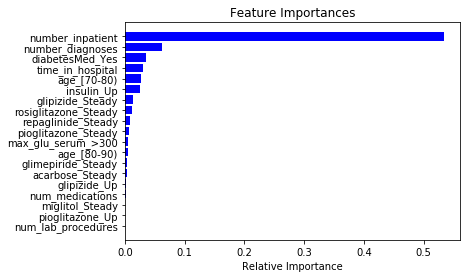

In [105]:
features = X1.columns
importances = model1.coef_[0]
indices = np.argsort(importances)[-19:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# LDA(Linear Discriminant Analysis)

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [113]:
lda.fit(Xtrain, ytrain)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [115]:
print('Training score =',lda.score(Xtrain, ytrain))
print('Test score =', lda.score(Xtest, ytest))

Training score = 0.619911280813072
Test score = 0.620537176547658


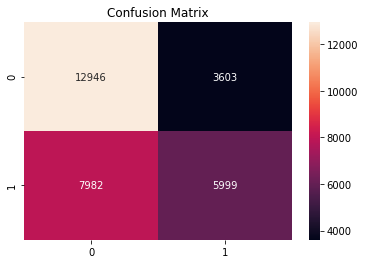

In [114]:
from sklearn.metrics import confusion_matrix
ypred = lda.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.6562657402388103


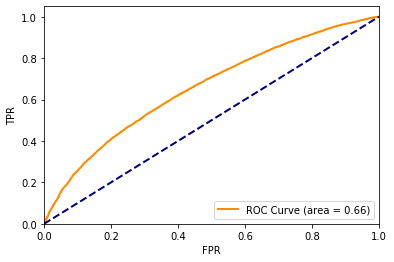

In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = lda.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Linear Discriminant Analysis (LDA)
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.The fitted model can also be used to reduce the dimensionality of the input, by projecting it to the most discriminative directions.

# Multicollinearity (VIF)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X1.columns
vif['vif']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif.T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Features,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
vif,4.75074,7.41769,2.05862,9.61563,NaN,NaN,1.48841,6.29273,4.84577,3.69987,...,1.93175,15335.1,105.983,2.21453,1.00193,1.00034,1.00031,1.00203,8.06701,10.607


In [88]:
vif[vif['vif']>4]

,Features,vif
0,time_in_hospital,4.750740
1,num_lab_procedures,7.417693
3,num_medications,9.615625
7,diag_1,6.292729
8,diag_2,4.845771
10,number_diagnoses,19.677528
12,race_Caucasian,5.373530
17,age_[10-20),5.287837
18,age_[20-30),11.365297
19,age_[30-40),24.701820


Variance Inflation Factor (VIF) is used to measure the multicollunearuty present in the data set. That means independent variables are correlated with each other and which wwould effect the model performance this can be treated by dropping one of either feature which are correlated as they both tend to convey same information to the model. As per our dataset we see that majority columns are having high multicollinearity so let us use PCA so that it will drop redundant noise from the data

# PCA

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc=pd.DataFrame(sc.fit_transform(X1),columns=X1.columns)

In [90]:
X_sc.shape

(101766, 82)

In [91]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pcsSummary_df = pd.DataFrame({"Std devn":np.sqrt(pcs.explained_variance_),"Proportion of var": pcs.explained_variance_ratio_,
"Cum proportion": np.cumsum(pcs.explained_variance_ratio_)})

In [93]:
pcsSummary_df

,Std devn,Proportion of var,Cum proportion
0,1.821435e+00,4.146993e-02,0.041470
1,1.562427e+00,3.051441e-02,0.071984
2,1.478423e+00,2.732141e-02,0.099306
3,1.465574e+00,2.684857e-02,0.126154
4,1.451733e+00,2.634385e-02,0.152498
...,...,...,...
77,6.993042e-02,6.112769e-05,0.999923
78,6.544503e-02,5.353762e-05,0.999976
79,4.359748e-02,2.375901e-05,1.000000
80,8.088798e-16,8.178501e-33,1.000000


In [94]:
pcsSummary_df = pcsSummary_df.T
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Std devn,1.821435,1.562427,1.478423,1.465574,1.451733,1.446718,1.419693,1.416278,1.411188,1.406317,...,0.122018,0.093066,0.088869,0.085266,0.076379,0.069930,0.065445,0.043597,8.088798e-16,8.894340e-17
Proportion of var,0.041470,0.030514,0.027321,0.026849,0.026344,0.026162,0.025194,0.025073,0.024893,0.024721,...,0.000186,0.000108,0.000099,0.000091,0.000073,0.000061,0.000054,0.000024,8.178501e-33,9.888563e-35
Cum proportion,0.041470,0.071984,0.099306,0.126154,0.152498,0.178660,0.203854,0.228927,0.253820,0.278541,...,0.999491,0.999599,0.999698,0.999789,0.999862,0.999923,0.999976,1.000000,1.000000e+00,1.000000e+00


In [95]:
pcsComponents_df = pd.DataFrame(pcs.components_.T,columns=pcsSummary_df.columns,index=X1.columns)

In [96]:
pcsComponents_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
time_in_hospital,1.412538e-01,-2.687201e-01,-7.873296e-02,-9.481957e-03,-0.176408,1.560437e-01,-2.621128e-03,-8.629459e-02,-4.082317e-02,-6.167103e-02,...,-2.104710e-03,-1.054520e-03,-4.683097e-04,-1.008722e-03,1.311779e-04,3.045249e-04,-7.728084e-04,-9.584214e-05,4.297969e-18,-0.000000e+00
num_lab_procedures,1.090629e-01,-2.845650e-01,-1.166118e-01,-9.186713e-02,-0.102465,-1.846791e-02,-8.396112e-02,1.580583e-02,3.408895e-02,2.860576e-02,...,-4.460022e-04,-8.749395e-04,9.579623e-05,-8.103761e-05,4.900736e-04,-6.630202e-05,5.385588e-04,7.852330e-05,1.661540e-16,1.460808e-16
num_procedures,6.110540e-02,-1.405438e-01,-4.464584e-02,2.322809e-02,-0.094333,1.016302e-01,1.020170e-02,-6.716446e-02,-2.002268e-02,-3.533325e-02,...,-1.695757e-04,2.999863e-04,1.655980e-04,-4.504058e-04,-2.011371e-04,-7.663943e-05,3.912791e-04,7.539251e-04,-1.129548e-16,-2.279273e-17
num_medications,2.384965e-01,-2.358714e-01,-4.216662e-02,2.976802e-02,-0.164019,1.699797e-01,3.029830e-02,-1.196231e-01,-5.558585e-02,-8.275016e-02,...,1.975354e-04,-7.176754e-04,-4.504830e-04,7.249816e-05,4.057930e-05,-2.039991e-04,1.058290e-04,1.007110e-03,-1.534096e-17,5.163117e-18
number_outpatient,-5.551115e-17,-2.220446e-16,8.933826e-17,-8.456777e-17,0.000000,-1.387779e-17,1.079865e-16,1.387779e-17,8.326673e-17,6.938894e-17,...,-6.279699e-16,-1.734723e-16,-7.953707e-16,1.543904e-16,2.525974e-15,4.093947e-16,-1.734723e-17,4.714111e-16,1.551544e-02,-9.998796e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
glimepiride-pioglitazone_Steady,-2.240446e-04,-1.024812e-04,4.631623e-04,-7.141442e-04,0.001492,-2.369311e-03,1.468557e-03,-2.275933e-04,-3.792177e-04,-1.009956e-03,...,7.000564e-05,2.839891e-05,1.180162e-05,2.811048e-05,1.097831e-05,-5.662170e-06,1.980133e-05,4.693921e-05,5.117434e-17,1.006140e-16
metformin-rosiglitazone_Steady,3.135454e-03,-2.769226e-03,-2.401332e-03,-2.005756e-03,-0.001504,-1.121330e-03,-1.278105e-03,-6.310160e-04,5.481550e-04,-8.570449e-04,...,4.273112e-05,2.054174e-05,1.031890e-05,2.801248e-05,6.788090e-06,-5.529798e-06,4.338852e-06,1.478945e-05,-1.734723e-17,1.110223e-16
metformin-pioglitazone_Steady,3.079432e-03,2.386334e-03,4.227831e-03,8.792382e-03,-0.001103,-5.620015e-03,-1.719308e-03,-1.782857e-03,8.120926e-04,-2.001316e-03,...,-1.320683e-04,4.729340e-05,7.855903e-05,1.821718e-04,-3.387755e-06,-9.550697e-06,9.848836e-06,2.345942e-05,1.110223e-16,1.908196e-16
change_No,-4.272812e-01,-1.612046e-02,-2.427022e-02,-8.655261e-03,0.002581,1.110505e-02,-4.679329e-02,1.935318e-02,7.402729e-03,2.715004e-02,...,1.226568e-02,6.452187e-03,2.834964e-03,5.500931e-03,1.957047e-03,-1.306150e-03,2.826554e-03,-1.057758e-03,8.673617e-17,-1.665335e-16


In [97]:
pcs.explained_variance_

array([3.31762666e+00, 2.44117670e+00, 2.18573405e+00, 2.14790702e+00,
       2.10752868e+00, 2.09299170e+00, 2.01552722e+00, 2.00584444e+00,
       1.99145264e+00, 1.97772698e+00, 1.96062866e+00, 1.91269181e+00,
       1.91136382e+00, 1.69881871e+00, 1.64379535e+00, 1.55033369e+00,
       1.38241350e+00, 1.35046919e+00, 1.30470725e+00, 1.26764045e+00,
       1.22252452e+00, 1.14524248e+00, 1.11844926e+00, 1.10583682e+00,
       1.06979534e+00, 1.06464169e+00, 1.04490257e+00, 1.04096471e+00,
       1.03402272e+00, 1.02837370e+00, 1.01962370e+00, 1.01484641e+00,
       1.01135579e+00, 1.00668153e+00, 1.00252147e+00, 1.00172126e+00,
       1.00094874e+00, 1.00047845e+00, 1.00019158e+00, 9.99826795e-01,
       9.99572446e-01, 9.99287445e-01, 9.98994062e-01, 9.98452686e-01,
       9.96542818e-01, 9.94115360e-01, 9.91465301e-01, 9.90420467e-01,
       9.86944430e-01, 9.81413629e-01, 9.72716201e-01, 9.66731854e-01,
       9.60713280e-01, 9.42564638e-01, 9.15812413e-01, 9.07027424e-01,
      

In [98]:
pcs.explained_variance_ratio_

array([4.14699257e-02, 3.05144088e-02, 2.73214071e-02, 2.68485740e-02,
       2.63438497e-02, 2.61621392e-02, 2.51938427e-02, 2.50728091e-02,
       2.48929133e-02, 2.47213443e-02, 2.45076174e-02, 2.39084126e-02,
       2.38918130e-02, 2.12350252e-02, 2.05472399e-02, 1.93789807e-02,
       1.72799989e-02, 1.68806990e-02, 1.63086803e-02, 1.58453500e-02,
       1.52814064e-02, 1.43153903e-02, 1.39804784e-02, 1.38228244e-02,
       1.33723104e-02, 1.33078904e-02, 1.30611537e-02, 1.30119311e-02,
       1.29251569e-02, 1.28545449e-02, 1.27451710e-02, 1.26854555e-02,
       1.26418232e-02, 1.25833954e-02, 1.25313953e-02, 1.25213927e-02,
       1.25117363e-02, 1.25058577e-02, 1.25022718e-02, 1.24977121e-02,
       1.24945328e-02, 1.24909703e-02, 1.24873031e-02, 1.24805359e-02,
       1.24566628e-02, 1.24263199e-02, 1.23931945e-02, 1.23801342e-02,
       1.23366841e-02, 1.22675498e-02, 1.21588330e-02, 1.20840294e-02,
       1.20087980e-02, 1.17819422e-02, 1.14475427e-02, 1.13377314e-02,
      

# With PCA

In [102]:
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)

In [103]:
X_train_2 = pcs.fit_transform(X_train)
X_test_2 = pcs.transform(X_test)

In [104]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
print('Training score =',model2.score(X_train_2, ytrain))
print('Test score =', model2.score(X_test_2, ytest))

Training score = 1.0
Test score = 0.5382902063544055


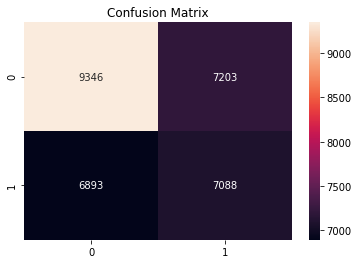

In [106]:
from sklearn.metrics import confusion_matrix
ypred = model2.predict(X_test_2)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.5358604323593449


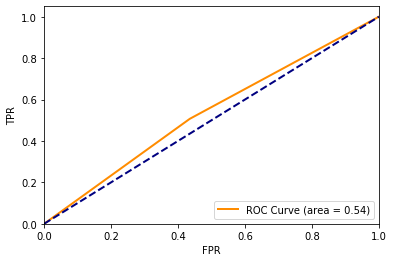

In [107]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model2.predict_proba(X_test_2)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Bagging

In [108]:
model3=BaggingClassifier()
model3.fit(X_train_2,ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [109]:
print('Training score =',model3.score(X_train_2, ytrain))
print('Test score =', model3.score(X_test_2, ytest))

Training score = 0.9825228816890337
Test score = 0.5794955781198821


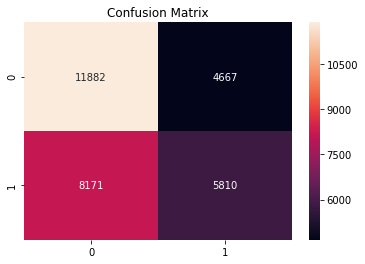

In [110]:
from sklearn.metrics import confusion_matrix
ypred = model3.predict(X_test_2)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.5960288621286913


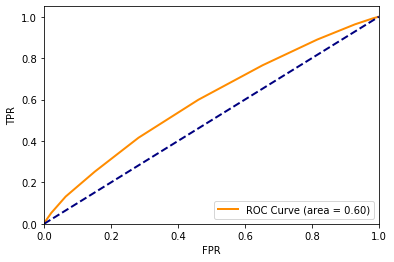

In [111]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model3.predict_proba(X_test_2)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [112]:
train = []
test = []
def model_fit(algo,X_train_2,ytrain,X_test_2,ytest):
  algo.fit(X_train_2,ytrain)
  y_train_pred=algo.predict(X_train_2)
  y_train_prob=algo.predict_proba(X_train_2)[:,1]
  print("auc score of train data",roc_auc_score(ytrain,y_train_prob))
  train.append(roc_auc_score(ytrain,y_train_prob))

  y_test_pred=algo.predict(X_test_2) #ML
  y_test_prob=algo.predict_proba(X_test_2)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(ytest,y_test_prob))
  test.append(roc_auc_score(ytest,y_test_prob))
  print("confusion_matrix",confusion_matrix(ytest,y_test_pred))
  print("classification_report")
  print(classification_report(ytest,y_test_pred))
  fpr,tpr,thresholds=roc_curve(ytest,y_test_prob)
  
  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

# Logistic Regression

auc score of train data 0.6513479056825533
auc score of test data 0.6506363623267819
confusion_matrix [[12935  3614]
 [ 8052  5929]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     16549
           1       0.62      0.42      0.50     13981

    accuracy                           0.62     30530
   macro avg       0.62      0.60      0.60     30530
weighted avg       0.62      0.62      0.60     30530

roc_auc 0.6506363623267819


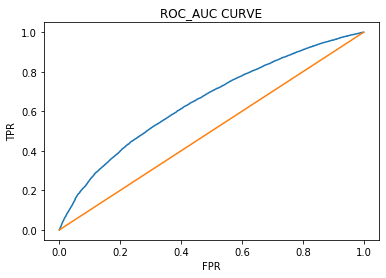

In [113]:
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc
lr = LogisticRegression()
model_fit(lr,X_train_2,ytrain,X_test_2,ytest)

# Decision Tree

auc score of train data 1.0
auc score of test data 0.5381714509616348
confusion_matrix [[9342 7207]
 [6825 7156]]
classification_report
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     16549
           1       0.50      0.51      0.50     13981

    accuracy                           0.54     30530
   macro avg       0.54      0.54      0.54     30530
weighted avg       0.54      0.54      0.54     30530

roc_auc 0.5381714509616348


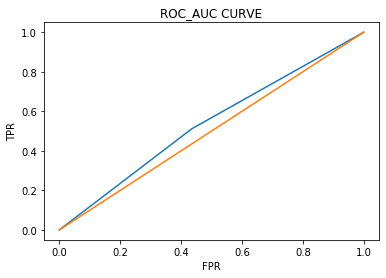

In [114]:
dtree = DecisionTreeClassifier()
model_fit(dtree,X_train_2,ytrain,X_test_2,ytest)

# Random Forest

auc score of train data 1.0
auc score of test data 0.6329423841180764
confusion_matrix [[11944  4605]
 [ 7423  6558]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.72      0.67     16549
           1       0.59      0.47      0.52     13981

    accuracy                           0.61     30530
   macro avg       0.60      0.60      0.59     30530
weighted avg       0.60      0.61      0.60     30530

roc_auc 0.6329423841180764


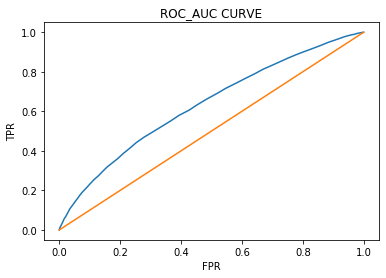

In [115]:
ran = RandomForestClassifier()
model_fit(ran,X_train_2,ytrain,X_test_2,ytest)

# Bagging

auc score of train data 0.9989246160705433
auc score of test data 0.5955256715227617
confusion_matrix [[11872  4677]
 [ 8171  5810]]
classification_report
              precision    recall  f1-score   support

           0       0.59      0.72      0.65     16549
           1       0.55      0.42      0.47     13981

    accuracy                           0.58     30530
   macro avg       0.57      0.57      0.56     30530
weighted avg       0.57      0.58      0.57     30530

roc_auc 0.5955256715227617


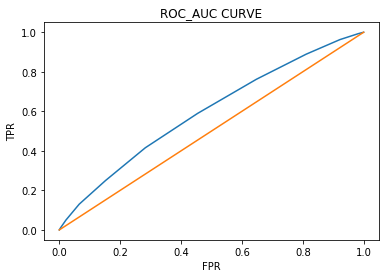

In [116]:
bag=BaggingClassifier()
model_fit(bag,X_train_2,ytrain,X_test_2,ytest)

Bagging model is overfitting for this data set as training set is performing better and test set is failing.

auc score of train data 0.651249351582032
auc score of test data 0.6506819037908671
confusion_matrix [[12923  3626]
 [ 8061  5920]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     16549
           1       0.62      0.42      0.50     13981

    accuracy                           0.62     30530
   macro avg       0.62      0.60      0.60     30530
weighted avg       0.62      0.62      0.60     30530

roc_auc 0.6506819037908671


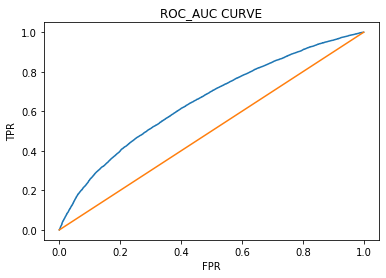

In [117]:
lr_bg=BaggingClassifier(base_estimator=lr)
model_fit(lr_bg,X_train_2,ytrain,X_test_2,ytest)

Bagging with base estimator (Logistic regression) is performing better on both training and testing let us use boosting models and see if we can improve the score


# Boosting

# Ada Boost

auc score of train data 0.6485863101906615
auc score of test data 0.6371827992401262
confusion_matrix [[12408  4141]
 [ 7779  6202]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.75      0.68     16549
           1       0.60      0.44      0.51     13981

    accuracy                           0.61     30530
   macro avg       0.61      0.60      0.59     30530
weighted avg       0.61      0.61      0.60     30530

roc_auc 0.6371827992401262


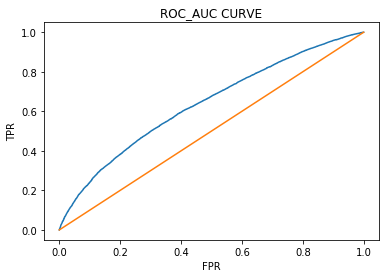

In [118]:
dt_bt=AdaBoostClassifier()
model_fit(dt_bt,X_train_2,ytrain,X_test_2,ytest)

# Gradiant Boost

auc score of train data 0.6730144629508095
auc score of test data 0.6490694001387871
confusion_matrix [[12978  3571]
 [ 8211  5770]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.78      0.69     16549
           1       0.62      0.41      0.49     13981

    accuracy                           0.61     30530
   macro avg       0.62      0.60      0.59     30530
weighted avg       0.61      0.61      0.60     30530

roc_auc 0.6490694001387871


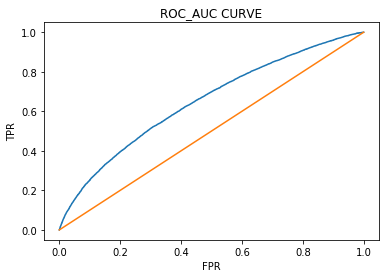

In [119]:
gb=GradientBoostingClassifier()
model_fit(gb,X_train_2,ytrain,X_test_2,ytest)

# XGBoost

In [120]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

auc score of train data 0.6719703208924066
auc score of test data 0.647880090228372
confusion_matrix [[12713  3836]
 [ 7927  6054]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.77      0.68     16549
           1       0.61      0.43      0.51     13981

    accuracy                           0.61     30530
   macro avg       0.61      0.60      0.60     30530
weighted avg       0.61      0.61      0.60     30530

roc_auc 0.647880090228372


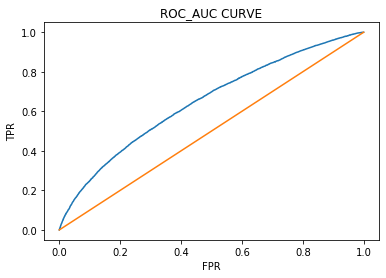

In [121]:
model_fit(xgb,X_train_2,ytrain,X_test_2,ytest)

# Hyper Parameter Tuning to avoid overfitting

In [122]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
parameters={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50),
            'min_samples_split':range(10,100),'n_estimators':[1,2,3,4,5,6]}
RS_rf= RandomizedSearchCV(rf, param_distributions=parameters, cv=3,random_state=0)
RS_rf.fit(X_train_2,ytrain)
RS_rf.best_params_

{'n_estimators': 6,
 'min_samples_split': 69,
 'min_samples_leaf': 31,
 'max_depth': 8}

auc score of train data 0.7056677621821763
auc score of test data 0.6323675727850556
confusion_matrix [[12572  3977]
 [ 8148  5833]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.76      0.67     16549
           1       0.59      0.42      0.49     13981

    accuracy                           0.60     30530
   macro avg       0.60      0.59      0.58     30530
weighted avg       0.60      0.60      0.59     30530

roc_auc 0.6323675727850556


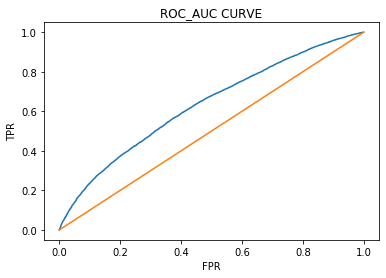

In [123]:
ran1 = RandomForestClassifier(n_estimators= 6,min_samples_split= 69,min_samples_leaf= 31,max_depth= 8)
model_fit(ran1,X_train_2,ytrain,X_test_2,ytest)

In [128]:
score = pd.DataFrame({'model':['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
                               'Bagging Classifier', 'Logistic Regression (bagged)',
                               'Ada Boost', 'Gradiant Boost', 'XG Boost Classifier','Random Forest (tunned)'],
                     'train_accuracy':train,'test_accuracy':test})
score

,model,train_accuracy,test_accuracy
0,Logistic Regression,0.651348,0.650636
1,Decision Tree Classifier,1.000000,0.538171
2,Random Forest Classifier,1.000000,0.632942
3,Bagging Classifier,0.998925,0.595526
4,Logistic Regression (bagged),0.651249,0.650682
5,Ada Boost,0.648586,0.637183
6,Gradiant Boost,0.673014,0.649069
7,XG Boost Classifier,0.671970,0.647880
8,Random Forest (tunned),0.705668,0.632368


# Cross Validation

In [132]:
cv2=model_selection.cross_val_score(RS_rf, X_train_2, ytrain, cv=10, scoring='roc_auc')
cv2

array([0.63259437, 0.62279393, 0.62089538, 0.6312854 , 0.63939059,
       0.64023035, 0.63012649, 0.63131349, 0.62649699, 0.64376122])

In [133]:
np.mean(cv2) 

0.6318888207673863

Random Forest K fold CV ROC AUC is 0.63 with the hyper parameter tuned 

In [134]:
cv3=model_selection.cross_val_score(gb, X_train_2, ytrain, cv=10, scoring='roc_auc')
cv3

array([0.65398368, 0.63628392, 0.63571903, 0.64638456, 0.65860502,
       0.65026111, 0.64390755, 0.64993769, 0.64386878, 0.65934062])

In [135]:
np.mean(cv3) 

0.647829197709572

Gradiant Boost K fold 10 ROC AUC CV is 0.65

Bagging with Logistic regression as base estimator is performing better in this data set with ROC AUC of 65.06 and further it can be improved by doing various feature engineering techniques. And Preprocesing the data by using discretization(binning) ,filling null values with algorithm based methods(Knn and Mice).With help of domain knowledge new features can be created from exixting features ore even we have few columns with codes we can map them into categories .